
**Objective and Data Description**

1. I sourced this dataset from Kaggle. My dataset is called 'Student Performance'. It tracks the grades of students in addition to many factors that may affect their academic performance, such as their sex, their class attendance, and how often they study.

2. My research object is to learn to utilize the regression algorithm on my student performance dataset and see if it performs well.

3. My research question is to predict student's grades using the best version of the regression model. I will start by testing the accuracy of testing the regression model to see how well it predicts student's grades off of their weekly study hours.



**Data Summaries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stat
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

#Step 1: Read the data
# Read the data, print the shape and first 5 rows.
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()
studentdata = pd.read_csv(io.BytesIO(uploaded['StudentsPerformance.csv']))
#print(uploaded.keys())
print(studentdata.shape)
print(studentdata.head())


Saving StudentsPerformance.csv to StudentsPerformance.csv
(145, 33)
  STUDENT ID  Student Age  Sex  Graduated high-school type  Scholarship type  \
0   STUDENT1            2    2                           3                 3   
1   STUDENT2            2    2                           3                 3   
2   STUDENT3            2    2                           2                 3   
3   STUDENT4            1    1                           1                 3   
4   STUDENT5            2    2                           1                 3   

   Additional work  Regular artistic or sports activity  \
0                1                                    2   
1                1                                    2   
2                2                                    2   
3                1                                    2   
4                2                                    2   

   Do you have a partner  Total salary if available  \
0                      2                 

**Algorithm Implementation**

[2.23148148]
[[-0.06989967]]


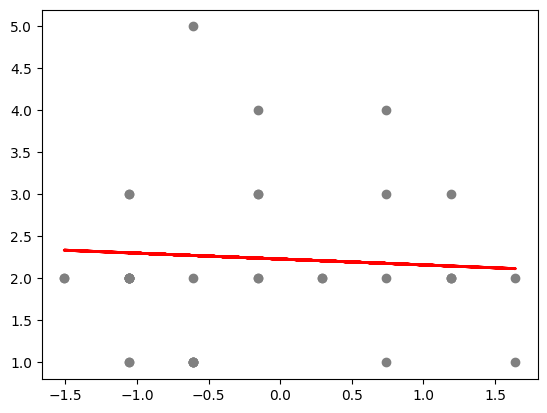

    Actual  Predicted
0        1   2.273952
1        1   2.273952
2        3   2.305369
3        2   2.179702
4        3   2.148285
5        2   2.116869
6        3   2.242536
7        3   2.242536
8        1   2.273952
9        2   2.305369
10       1   2.305369
11       2   2.305369
12       4   2.242536
13       1   2.273952
14       2   2.336786
15       2   2.305369
16       2   2.305369
17       2   2.305369
18       2   2.148285
19       1   2.179702
20       2   2.211119
21       2   2.336786
22       2   2.242536
23       1   2.116869
24       2   2.148285
25       2   2.273952
26       2   2.305369
27       2   2.148285
28       1   2.305369
29       2   2.242536
30       3   2.305369
31       5   2.273952
32       2   2.211119
33       4   2.179702
34       2   2.305369
35       3   2.179702
36       1   2.273952
Mean Squared Error: 0.8859333604709282
Root Mean Squared Error: 0.9412403308777881


In [ ]:
# Reshape the data using array.reshape(1, -1) if it contains a single sample with 1 column but unknown rows so use all rows.
grade_reshape = studentdata['GRADE'].values.reshape(-1,1)
#print(grade_reshape)

study_reshape= studentdata['Weekly study hours'].values.reshape(-1,1)

#Regression
X_train, X_test, y_train, y_test = train_test_split(grade_reshape, study_reshape, test_size=0.25, random_state=0)
regressor = LinearRegression()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)
#Training the Regression algorithm
regressor.fit(X_train, y_train)
 # Intercept:
print(regressor.intercept_)
# Slope:
print(regressor.coef_)

y_pred = regressor.predict(X_test)
# Create scatter plot
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

# Mean Squared Errror and Root Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

**Logistic Regression**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

X = studentdata[studentdata.columns[1:31]]
print(X)
y = studentdata[['GRADE']]

# Dividing data into two subsets :train and test set.Training set trains the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Data normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# defining grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, np.ravel(y_train))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

model=LogisticRegression(**grid_result.best_params_)
model.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)
print(y_pred)

# Step 6: we can check the performance of classifier with the help of various classification mertices like accuracy, precision, recall, f1 score etc. classification_report, confusion_matrix functions are used to calculate those metrices. For more on classification metrices and confusion matrix visit here.
#print(pred_real)

print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)

     Student Age  Sex  Graduated high-school type  Scholarship type  \
0              2    2                           3                 3   
1              2    2                           3                 3   
2              2    2                           2                 3   
3              1    1                           1                 3   
4              2    2                           1                 3   
..           ...  ...                         ...               ...   
140            2    1                           2                 3   
141            1    1                           2                 4   
142            1    1                           1                 4   
143            2    1                           2                 4   
144            1    1                           1                 5   

     Additional work  Regular artistic or sports activity  \
0                  1                                    2   
1                  1     

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


Best: 0.246717 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.182828 (0.112055) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.182828 (0.112055) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.181061 (0.105325) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.212121 (0.113821) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.212121 (0.113821) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.169697 (0.103405) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.218687 (0.112328) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.218687 (0.112328) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.221212 (0.102490) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.235606 (0.104431) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.235606 (0.104431) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.246717 (0.117814) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.196717 (0.096829) wit

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This result shows that when a logistic regression model uses all of the other variables in the dataset to predict student's grades, it has an accuracy of 24%. So it can corrrectly predict a student's grade 24% of the time. Next, I will run a ridge regression model to see if we can improve the accuracy of the model.

**Performance Improvement**

In [ ]:
# https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification

# example of grid searching key hyperparametres for ridge classifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


X = studentdata[studentdata.columns[1:31]]
print(X)
y = studentdata[['GRADE']]

# Dividing data into two subsets :train and test set.Training set trains the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Data normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, np.ravel(y_train))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

model=RidgeClassifier(**grid_result.best_params_)
model.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)
print(y_pred)

# Step 6: we can check the performance of classifier with the help of various classification mertices like accuracy, precision, recall, f1 score etc. classification_report, confusion_matrix functions are used to calculate those metrices. For more on classification metrices and confusion matrix visit here.
#print(pred_real)

print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)

     Student Age  Sex  Graduated high-school type  Scholarship type  \
0              2    2                           3                 3   
1              2    2                           3                 3   
2              2    2                           2                 3   
3              1    1                           1                 3   
4              2    2                           1                 3   
..           ...  ...                         ...               ...   
140            2    1                           2                 3   
141            1    1                           2                 4   
142            1    1                           1                 4   
143            2    1                           2                 4   
144            1    1                           1                 5   

     Additional work  Regular artistic or sports activity  \
0                  1                                    2   
1                  1     

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


Best: 0.273737 using {'alpha': 0.7}
0.267929 (0.129831) with: {'alpha': 0.1}
0.267929 (0.129831) with: {'alpha': 0.2}
0.267929 (0.129831) with: {'alpha': 0.3}
0.267929 (0.129831) with: {'alpha': 0.4}
0.267929 (0.129831) with: {'alpha': 0.5}
0.267929 (0.129831) with: {'alpha': 0.6}
0.273737 (0.127455) with: {'alpha': 0.7}
0.273737 (0.127455) with: {'alpha': 0.8}
0.273737 (0.127455) with: {'alpha': 0.9}
0.273737 (0.127455) with: {'alpha': 1.0}
[2 2 6 1 1 6 6 3 6 7 6 1 1 2 5 7 6 2 7 1 3 2 7 7 6 2 3 3 4]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.40      0.33      0.36         6
           2       0.00      0.00      0.00         4
           3       0.25      0.17      0.20         6
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1

    ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


With a ridge regression model, our accuracy has decreased to be 10%. So our logistic regression model was more accurate. For this dataset, the logistic regression model was also more accurate than when I ran it on a decision trees model, which had a accuracy of 16.22%.

**Conclusion**

1. This project has found that a logistic regression alogrithm prediting a student's grade had an accuracy rate of 24%. The performance evaluation, where I tried running a ridge regression, had worse results.
2. The accuracy of this model was lower than I would preferably like to see. Something about this dataset that may have made it not ideal for logistic regression is colinearity. There is a good chance that some of the predictor variables may be highly related to each other. For example, a student with many study hours may be more likely to not work many hours outside of school, so they have more time to study. Since logistic regression models like low colinearity, it may have had a difficult time with this dataset.
3.In a 2020 study from the University of Basrah, student performance was evaluated using many different machine learning algorithms. In that study, logistic regression was found to be the highest performing. In that study, it was found that the logistic regression model was the most accurate when it factored in demographic data alone. So it would be interesting to run the model again ommitting all data that is not demographic.

  Ali Salah Hashim et al 2020 IOP Conf. Ser.: Mater. Sci. Eng. 928 032019

4. As I complete more algorithm projects, I am curious to see if the results of the 2020 study hold true and logistic regression will be the highest performing algorithm. Additionally, it has continued to be helpful to run the same dataset through multiple algorithms. It has really helped me identify the differences between them. Seeing the different ways we split the data into x and y has been particularly interesting to me.